# librosa之mfcc提取过程解析

### 1. 导包

In [1]:
import numpy as np
import librosa
from scipy.io import wavfile
from scipy.fftpack import dct
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

### 2. 绘图工具

In [2]:
# 绘制时域图
def plot_time(signal, sample_rate):
    time = np.arange(0, len(signal)) * (1.0 / sample_rate)
    plt.figure(figsize=(20, 5))
    plt.plot(time, signal)
    plt.xlabel('Time(s)')
    plt.ylabel('Amplitude')
    plt.grid()

In [3]:
# 绘制频域图
def plot_freq(signal, sample_rate, fft_size=512):
    xf = np.fft.rfft(signal, fft_size) / fft_size
    freqs = np.linspace(0, sample_rate/2, fft_size/2 + 1)
    xfp = 20 * np.log10(np.clip(np.abs(xf), 1e-20, 1e100))
    plt.figure(figsize=(20, 5))
    plt.plot(freqs, xfp)
    plt.xlabel('Freq(hz)')
    plt.ylabel('dB')
    plt.grid()

In [4]:
# 绘制频谱图
def plot_spectrogram(spec, note):
    fig = plt.figure(figsize=(20, 5))
    heatmap = plt.pcolor(spec)
    fig.colorbar(mappable=heatmap)
    plt.xlabel('Time(s)')
    plt.ylabel(note)
    plt.tight_layout()

### 3. 数据准备

In [5]:
sample_rate, signal = wavfile.read('./resources/aa.wav')
print('sample rate:', sample_rate, ', frame length:', len(signal))

sample rate: 8000 , frame length: 17520


In [10]:
data = librosa.load('./resources/aa.wav', sr=sample_rate)[0]
mel = librosa.feature.melspectrogram(y=data, sr=sample_rate, n_fft=256, hop_length=64, n_mels=80, fmax=4000)
mfcc = librosa.feature.mfcc(S=librosa.power_to_db(mel), n_mfcc=40)
print(mfcc.shape)

(40, 274)


### librosa 提取mel滤波器组

(40, 257)


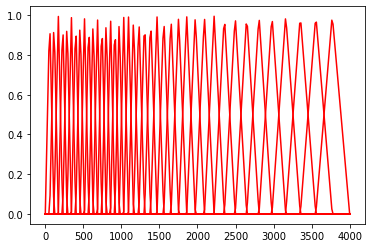

In [6]:
NFFT = 512
mel_filters = librosa.filters.mel(sr=sample_rate, n_fft=NFFT, n_mels=40, norm=None)
print(mel_filters.shape)

freqs = np.linspace(0, sample_rate/2, NFFT/2 + 1)

for f in mel_filters:
    plt.plot(freqs,f,'r')
plt.show()    